In [2]:
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [4]:
Bit_pre = pd.read_csv("BTC-USD 20150807-20200910.csv")
print(Bit_pre.head(5))
print(Bit_pre.tail(5))
Bit_pre.dtypes
Bit_pre.info()
Bit_pre.describe()

         Date        Open        High         Low       Close   Adj Close  \
0  2015-08-07  278.740997  280.391998  276.365997  279.584991  279.584991   
1  2015-08-08  279.742004  279.928009  260.709991  260.997009  260.997009   
2  2015-08-09  261.115997  267.002991  260.467987  265.083008  265.083008   
3  2015-08-10  265.477997  267.032013  262.596008  264.470001  264.470001   
4  2015-08-11  264.342010  270.385986  264.093994  270.385986  270.385986   

     Volume  
0  42484800  
1  58533000  
2  23789600  
3  20979400  
4  25433900  
            Date          Open          High           Low         Close  \
1857  2020-09-06  10167.216797  10353.927734  10056.885742  10280.351563   
1858  2020-09-07  10280.998047  10399.153320   9916.493164  10369.563477   
1859  2020-09-08  10369.306641  10414.775391   9945.110352  10131.516602   
1860  2020-09-09  10134.151367  10350.542969  10017.250977  10242.347656   
1861  2020-09-10  10242.330078  10503.912109  10238.135742  10363.138672 

,Open,High,Low,Close,Adj Close,Volume
count,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1.862000e+03
mean,5087.849626,5216.986394,4949.993423,5093.172558,5093.172558,9.251785e+09
std,4070.829671,4191.882568,3928.689250,4071.231332,4071.231332,1.211494e+10
min,210.067993,226.320999,199.567001,210.494995,210.494995,1.271260e+07
25%,735.983246,741.844986,724.167999,736.166244,736.166244,1.169758e+08
50%,4871.944092,5014.274902,4715.079834,4885.943848,4885.943848,4.219645e+09
75%,8368.639893,8599.800293,8183.189209,8373.222412,8373.222412,1.549157e+10
max,19475.800781,20089.000000,18974.099609,19497.400391,19497.400391,7.415677e+10


In [5]:
Bit_pre = pd.read_csv("BTC-USD 20150807-20200910.csv",index_col= 'Date')
print(Bit_pre.head(5)) 
Bit_pre.info()
Bit_pre.index = pd.to_datetime(Bit_pre.index)
print(Bit_pre.index)
Bit_pre.head(5)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-08-07  278.740997  280.391998  276.365997  279.584991  279.584991   
2015-08-08  279.742004  279.928009  260.709991  260.997009  260.997009   
2015-08-09  261.115997  267.002991  260.467987  265.083008  265.083008   
2015-08-10  265.477997  267.032013  262.596008  264.470001  264.470001   
2015-08-11  264.342010  270.385986  264.093994  270.385986  270.385986   

              Volume  
Date                  
2015-08-07  42484800  
2015-08-08  58533000  
2015-08-09  23789600  
2015-08-10  20979400  
2015-08-11  25433900  
<class 'pandas.core.frame.DataFrame'>
Index: 1862 entries, 2015-08-07 to 2020-09-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1862 non-null   float64
 1   High       1862 non-null   float64
 2   Low        1862 non-null   float64
 3  

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,278.740997,280.391998,276.365997,279.584991,279.584991,42484800
2015-08-08,279.742004,279.928009,260.709991,260.997009,260.997009,58533000
2015-08-09,261.115997,267.002991,260.467987,265.083008,265.083008,23789600
2015-08-10,265.477997,267.032013,262.596008,264.470001,264.470001,20979400
2015-08-11,264.342010,270.385986,264.093994,270.385986,270.385986,25433900


Text(0, 0.5, 'Daily Bitcoin price')

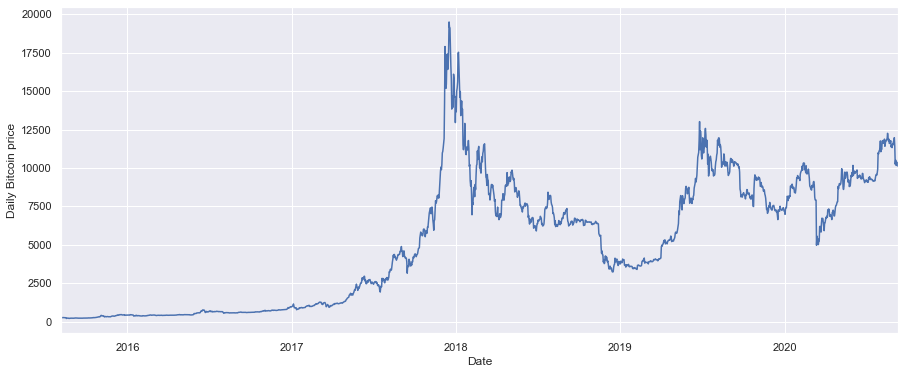

In [6]:
Bit_pre['Close'].plot()
plt.ylabel("Daily Bitcoin price")

In [7]:
Bit_pre = Bit_pre['Close']

Text(0, 0.5, 'Weekly bitcoin price')

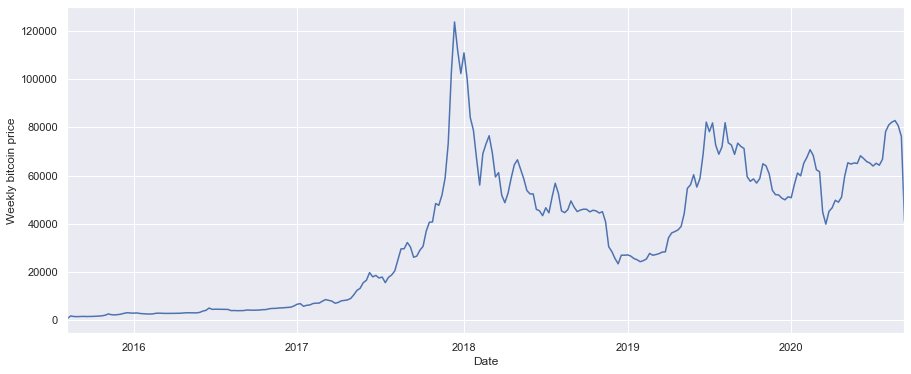

In [8]:
weekly = Bit_pre.resample('W').sum()
weekly.plot()
plt.ylabel('Weekly bitcoin price')

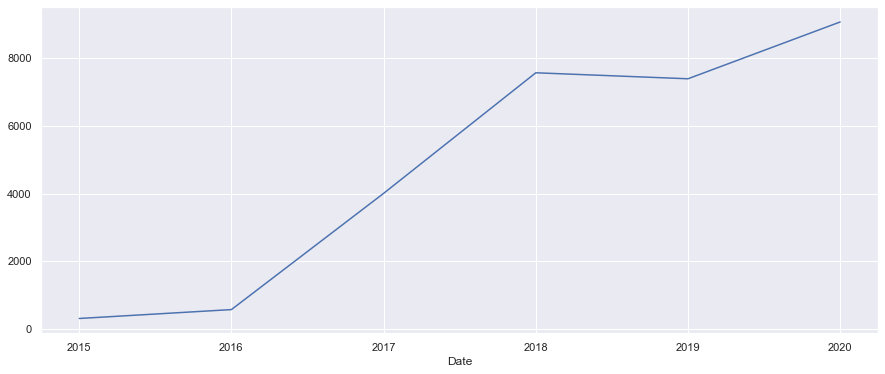

In [9]:
by_year = Bit_pre.groupby(Bit_pre.index.year).mean()
by_year.plot()

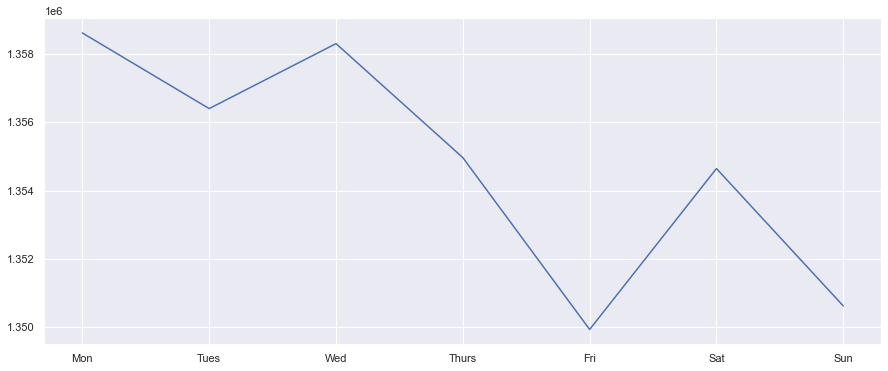

In [10]:
by_weekday = Bit_pre.groupby(Bit_pre.index.dayofweek).sum()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot()

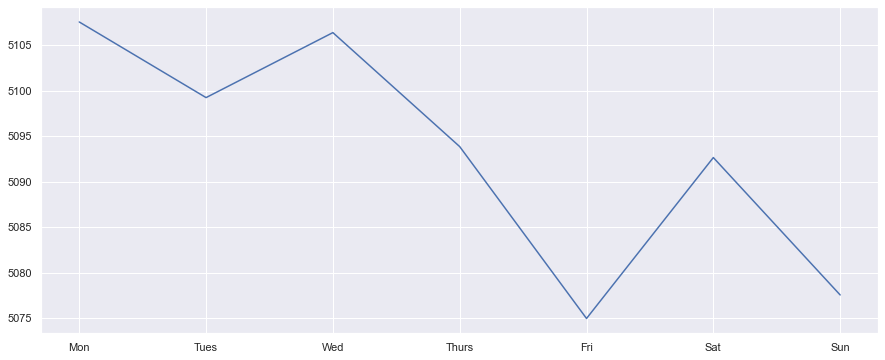

In [11]:
by_weekday = Bit_pre.groupby(Bit_pre.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot()

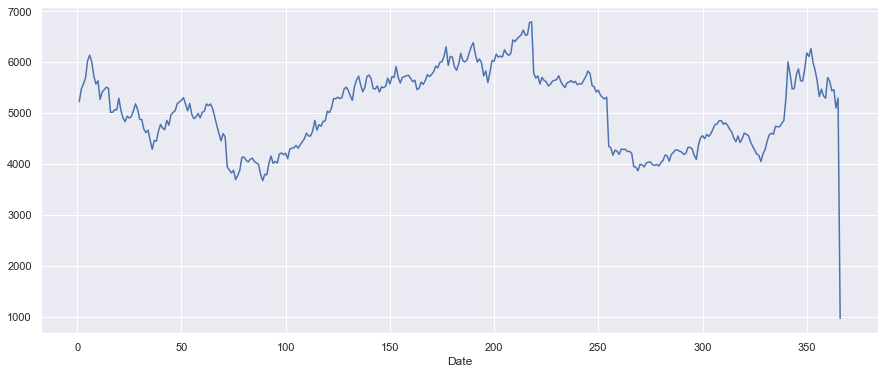

In [12]:
by_day = Bit_pre.groupby(Bit_pre.index.dayofyear).mean()
by_day.plot()

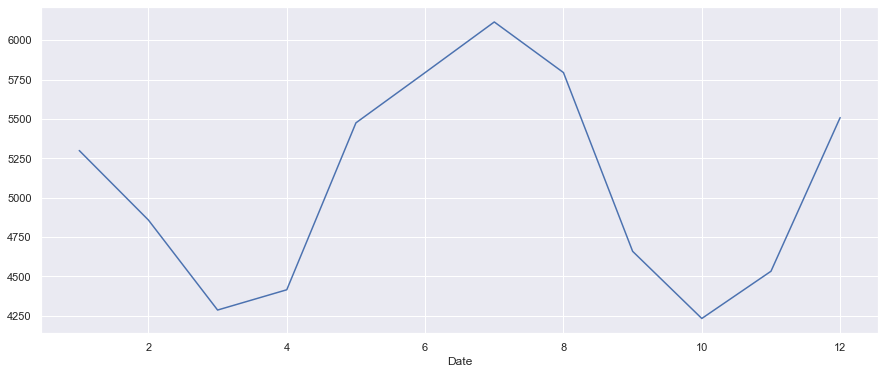

In [13]:
by_month = Bit_pre.groupby(Bit_pre.index.month).mean()
by_month.plot()

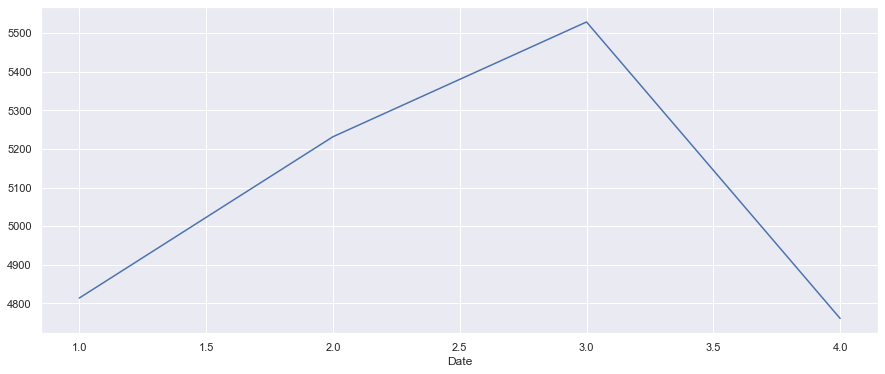

In [14]:
by_quarter = Bit_pre.groupby(Bit_pre.index.quarter).mean()
by_quarter.plot()

Date
1    AxesSubplot(0.125,0.2;0.775x0.68)
2    AxesSubplot(0.125,0.2;0.775x0.68)
3    AxesSubplot(0.125,0.2;0.775x0.68)
4    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Close, dtype: object

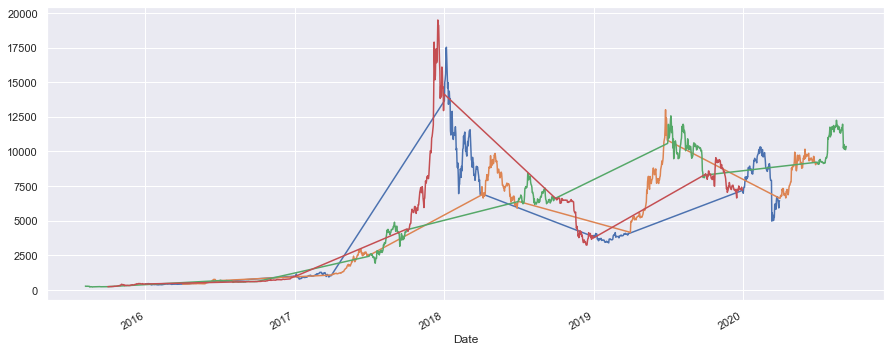

In [15]:
by_quarter = Bit_pre.groupby(Bit_pre.index.quarter)
by_quarter.plot()

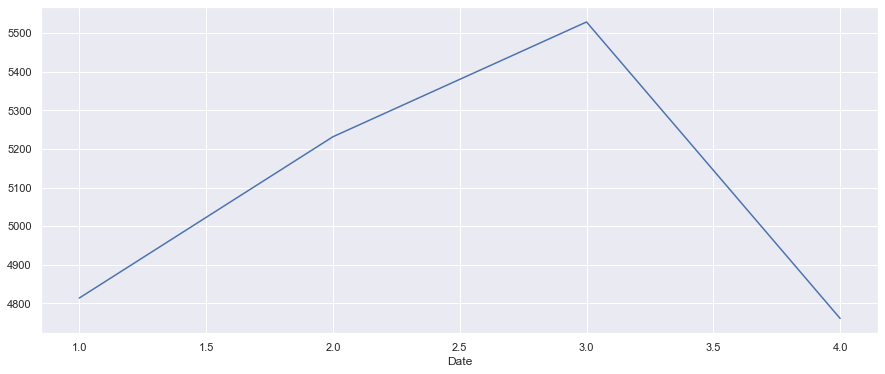

In [16]:
by_quarter_overall = Bit_pre.groupby(Bit_pre.index.quarter).mean()
by_quarter_overall.plot()

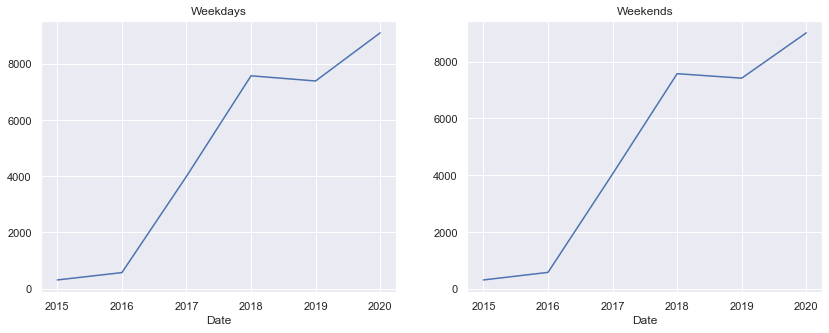

In [17]:
weekend = np.where(Bit_pre.index.weekday < 5, 'Weekday', 'Weekend')
by_time = Bit_pre.groupby([weekend, Bit_pre.index.year]).mean()
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays')
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends')

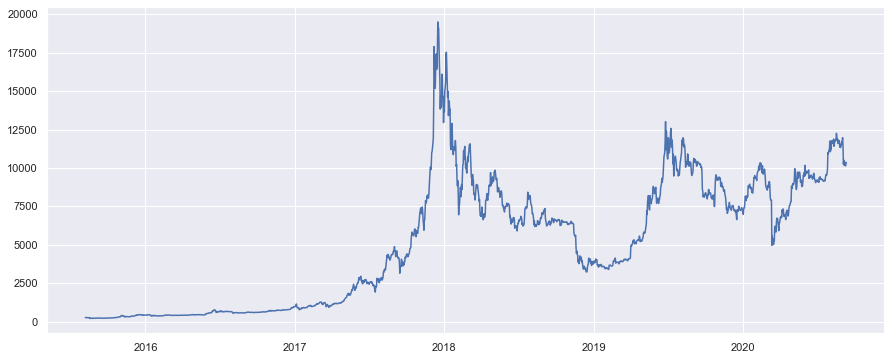

In [18]:
test_sta =  Bit_pre
plt.plot(test_sta)

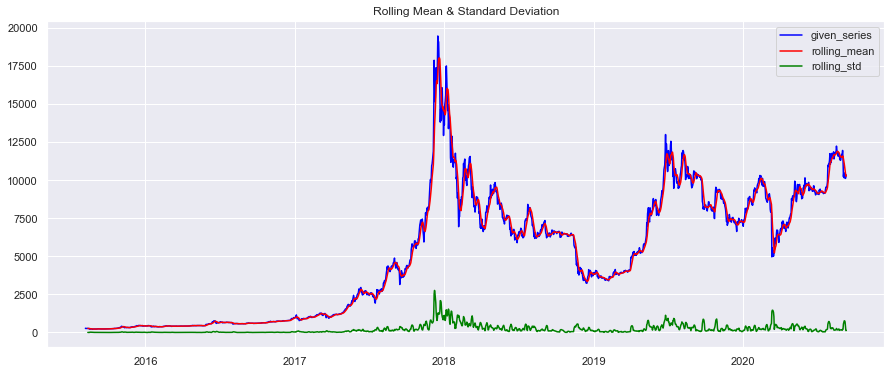

Results of Dickey-Fuller Test:
Test Statistic                   -1.931296
p-value                           0.317484
#Lags Used                       20.000000
Number of Observations Used    1841.000000
Critical Value (1%)              -3.433907
Critical Value (5%)              -2.863111
Critical Value (10%)             -2.567606
dtype: float64


In [20]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()
    
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
      
test_for_stationary(test_sta)   

#### Interpreting Results of Dickey-Fuller Test:
Test statistc is smaller than critical values (1%, 5%, and 10%). In addition, the p-value is larger than our significant level (5%).The test statistic is very large compared to the crtical value. The above series show that rolling mean value varies with time and is not stationary. The series needs to be Stationarized. we need to eliminate the trend and seasonality from the series to make it stationary.

## Transforming the data - (to eliminate trend)

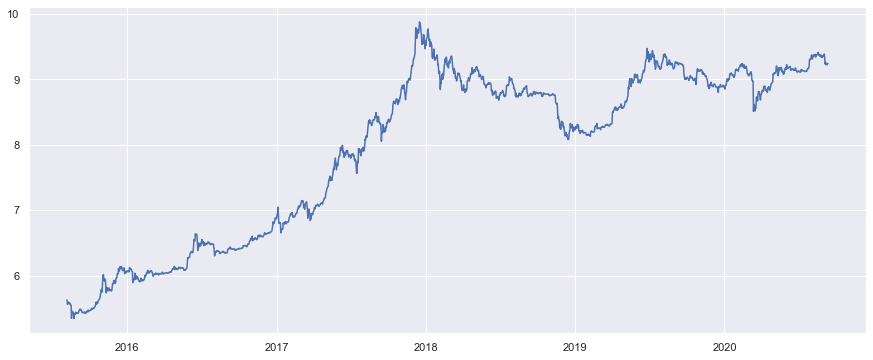

In [21]:
test_sta_logtransformed = np.log(test_sta)
plt.plot(test_sta_logtransformed)

In [22]:
test_sta_logtransformed.head(10)

Date
2015-08-07    5.633306
2015-08-08    5.564509
2015-08-09    5.580043
2015-08-10    5.577728
2015-08-11    5.599851
2015-08-12    5.584909
2015-08-13    5.576252
2015-08-14    5.582293
2015-08-15    5.566629
2015-08-16    5.554923
Name: Close, dtype: float64

## Smoothing by Rolling average

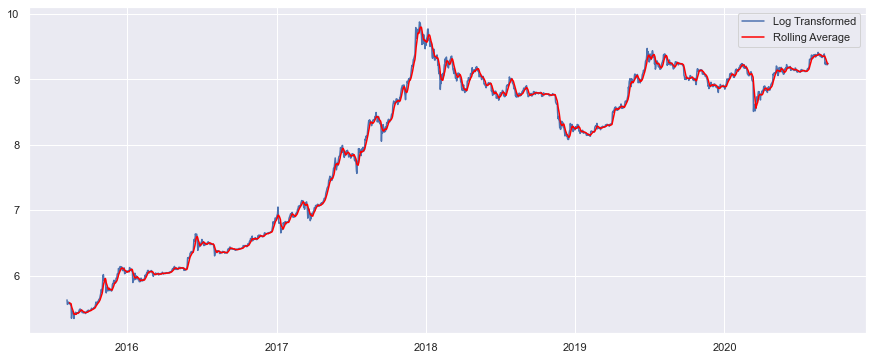

In [23]:
Rolling_average = test_sta_logtransformed.rolling(window = 7, center= False).mean()
plt.plot(test_sta_logtransformed, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')

#### The red line shows the rolling mean. Note that since we are taking average of last 7 values, rolling mean is not defined for first 7 values. This can be observed as:

In [24]:
Rolling_average.head(10)

Date
2015-08-07         NaN
2015-08-08         NaN
2015-08-09         NaN
2015-08-10         NaN
2015-08-11         NaN
2015-08-12         NaN
2015-08-13    5.588085
2015-08-14    5.580798
2015-08-15    5.581101
2015-08-16    5.577512
Name: Close, dtype: float64

#### Lets subtract this Rolling average this from the original log transfomred series.

In [25]:
log_Rolling_difference = test_sta_logtransformed - Rolling_average
log_Rolling_difference.head(10)
log_Rolling_difference.tail(10)

Date
2020-09-01    0.031279
2020-09-02   -0.015393
2020-09-03   -0.109125
2020-09-04   -0.070082
2020-09-05   -0.085533
2020-09-06   -0.056078
2020-09-07   -0.030427
2020-09-08   -0.029824
2020-09-09   -0.003470
2020-09-10    0.006620
Name: Close, dtype: float64

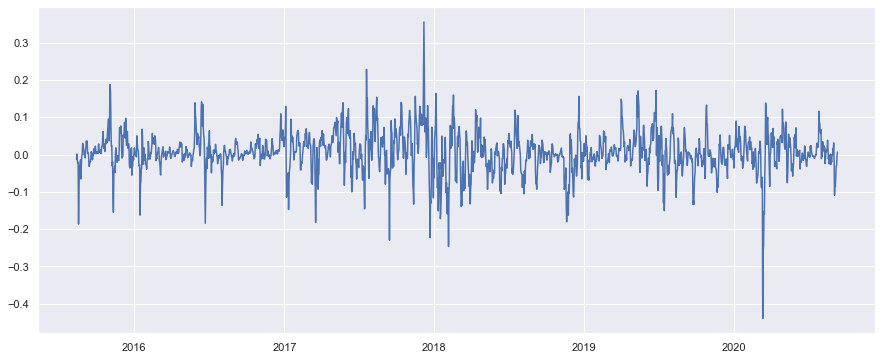

In [26]:
log_Rolling_difference.dropna(inplace=True)
plt.plot(log_Rolling_difference)

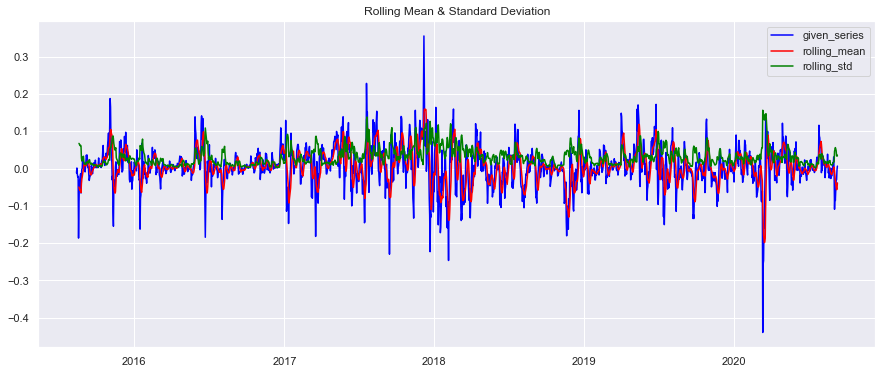

Results of Dickey-Fuller Test:
Test Statistic                -1.579612e+01
p-value                        1.087727e-28
#Lags Used                     3.000000e+00
Number of Observations Used    1.852000e+03
Critical Value (1%)           -3.433886e+00
Critical Value (5%)           -2.863102e+00
Critical Value (10%)          -2.567601e+00
dtype: float64


In [27]:
test_for_stationary(log_Rolling_difference)

#### Use exponential_weighted_moving_average instead of moving average to improve the solution

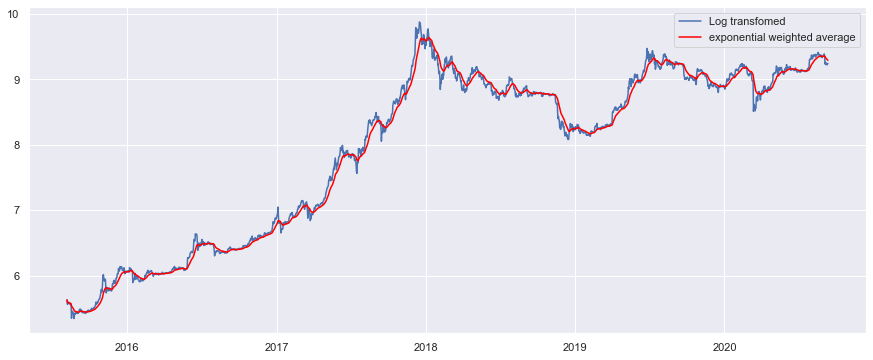

In [29]:
expwighted_avg = test_sta_logtransformed.ewm(halflife=7,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(test_sta_logtransformed, label = 'Log transfomed')
plt.plot(expwighted_avg, color='red', label = 'exponential weighted average')
plt.legend(loc = 'best')

In [30]:
expwighted_avg.head(10)

Date
2015-08-07    5.633306
2015-08-08    5.597206
2015-08-09    5.590910
2015-08-10    5.587110
2015-08-11    5.590186
2015-08-12    5.589075
2015-08-13    5.586658
2015-08-14    5.585905
2015-08-15    5.582824
2015-08-16    5.578639
Name: Close, dtype: float64

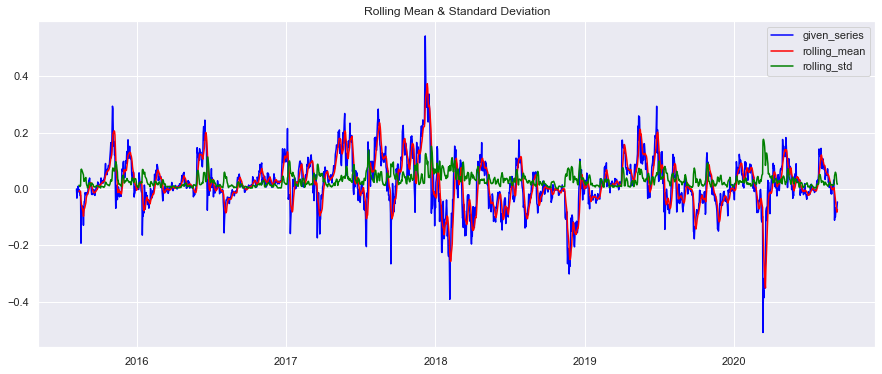

Results of Dickey-Fuller Test:
Test Statistic                -8.630585e+00
p-value                        5.770148e-14
#Lags Used                     1.000000e+00
Number of Observations Used    1.860000e+03
Critical Value (1%)           -3.433871e+00
Critical Value (5%)           -2.863095e+00
Critical Value (10%)          -2.567598e+00
dtype: float64


In [31]:
log_expmovwt_diff = test_sta_logtransformed - expwighted_avg

test_for_stationary(log_expmovwt_diff)

#### Interpreting result:
Now the current time series is stationary,the TS (test_statistic) value is less than 1% critcal value. Since weights are assigned to values from the starting index. Therefore the test works.

## Difference

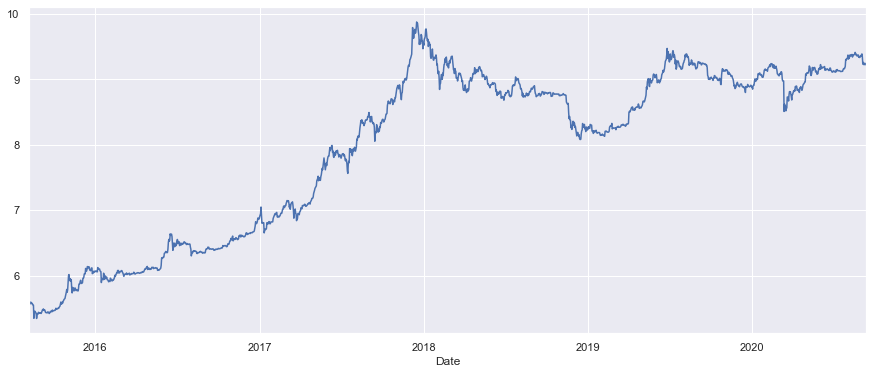

In [34]:
test_sta_logtransformed.plot()

Date
2015-08-07         NaN
2015-08-08         NaN
2015-08-09         NaN
2015-08-10         NaN
2015-08-11         NaN
2015-08-12         NaN
2015-08-13         NaN
2015-08-14   -0.051014
2015-08-15    0.002120
2015-08-16   -0.025120
Name: Close, dtype: float64

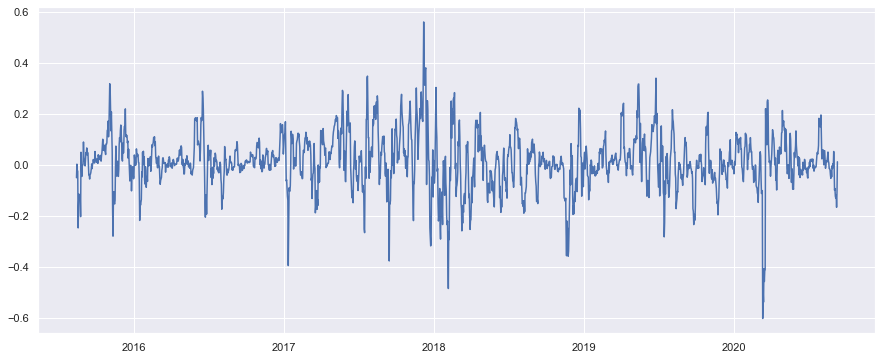

In [35]:
test_sta_diff_logtrans = test_sta_logtransformed -test_sta_logtransformed.shift(7)
plt.plot(test_sta_diff_logtrans)
test_sta_diff_logtrans.head(10)

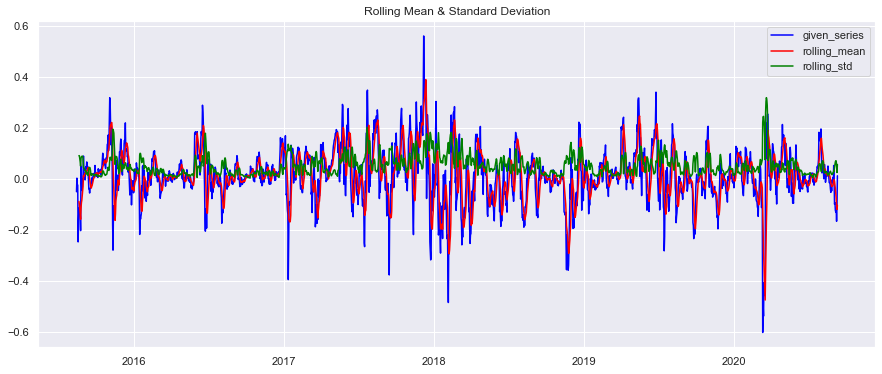

Results of Dickey-Fuller Test:
Test Statistic                -7.803769e+00
p-value                        7.374198e-12
#Lags Used                     2.500000e+01
Number of Observations Used    1.829000e+03
Critical Value (1%)           -3.433930e+00
Critical Value (5%)           -2.863122e+00
Critical Value (10%)          -2.567612e+00
dtype: float64


In [36]:
test_sta_diff_logtrans.dropna(inplace=True)
test_for_stationary(test_sta_diff_logtrans)

#### Interpreting Results:
The Dickey-Fuller test statis is very much less than 1% criticasl value than in the previous case. We can say that the Time series is stationary with 99% confidence

## Forcasting

In [38]:
lag_acf = acf(test_sta_diff_logtrans, nlags=30)
lag_pacf = pacf(test_sta_diff_logtrans, nlags=50, method='ols')

D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Autocorrelation Function')

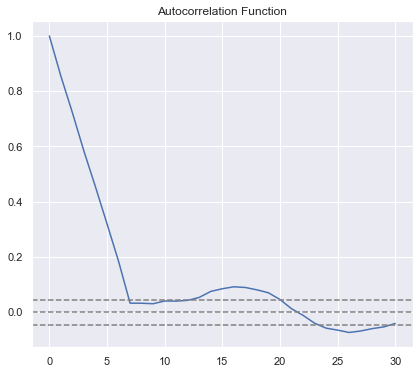

In [39]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(test_sta_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(test_sta_diff_logtrans)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

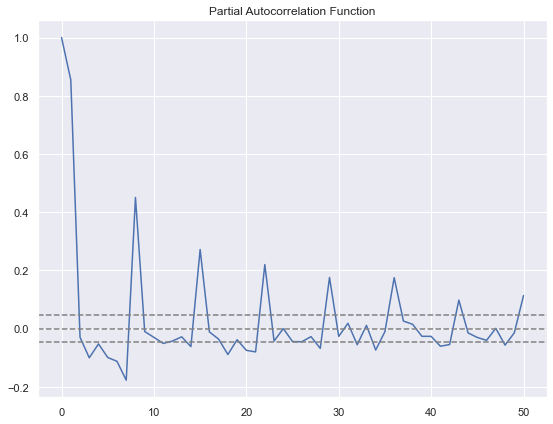

In [40]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(test_sta_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(test_sta_diff_logtrans)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

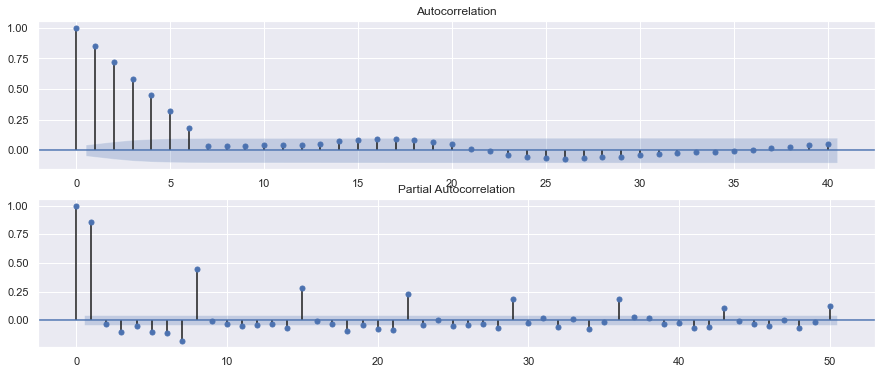

In [41]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(test_sta_diff_logtrans, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(test_sta_diff_logtrans, ax=pyplot.gca(), lags=50)
pyplot.show()

#### Observation:
Below are some observations from the plots.
In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as: the Lag values are identified from PACF and ACF plots for Autoregression(AR) and Moving Average(MA) parameters.

In [42]:
from statsmodels.tsa.arima_model import ARIMA

In [43]:
test_sta_diff_logtrans = test_sta_diff_logtrans.fillna(0)

## AR Model

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


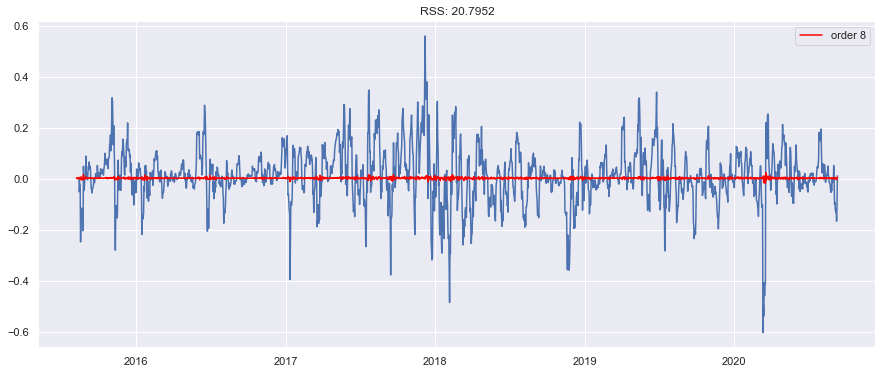

In [46]:
model = ARIMA(test_sta_logtransformed, order=(8, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(test_sta_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 8')
RSS = results_AR.fittedvalues-test_sta_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


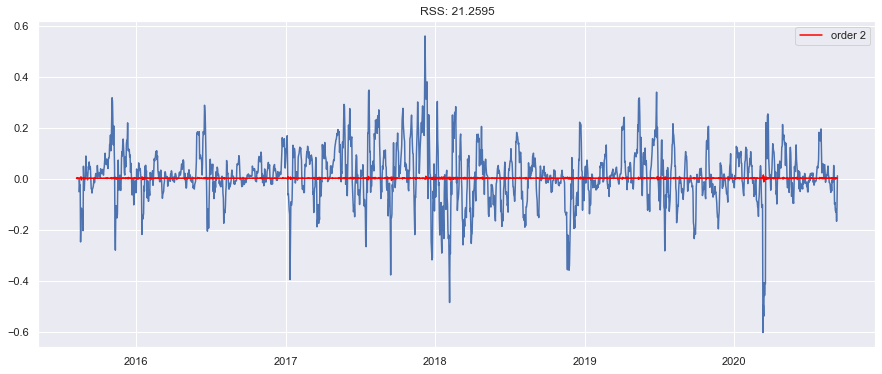

In [47]:
model = ARIMA(test_sta_logtransformed, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(test_sta_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 2')
RSS = results_AR.fittedvalues-test_sta_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc ='best')

In [48]:
print(results_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1861
Model:                 ARIMA(2, 1, 0)   Log Likelihood                3362.514
Method:                       css-mle   S.D. of innovations              0.040
Date:                Tue, 26 Jan 2021   AIC                          -6717.028
Time:                        01:10:44   BIC                          -6694.913
Sample:                    08-08-2015   HQIC                         -6708.878
                         - 09-10-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0019      0.001      2.115      0.034       0.000       0.004
ar.L1.D.Close    -0.0272      0.023     -1.173      0.241      -0.073       0.018
ar.L2.D.Close     0.0241      0.023     

## MA model

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 20.7905')

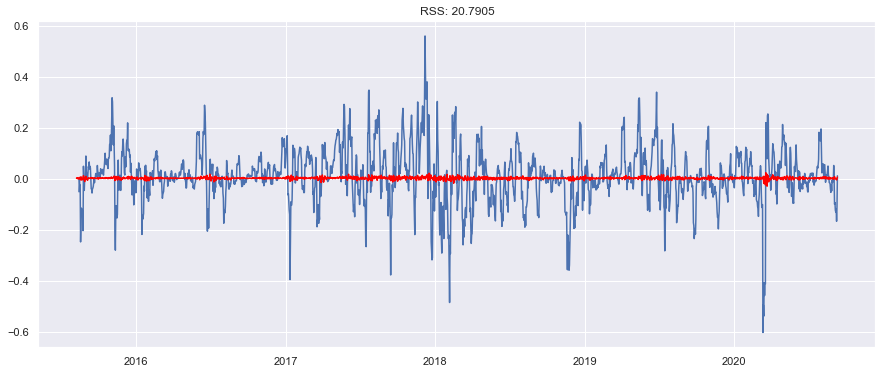

In [49]:
model = ARIMA(test_sta_logtransformed, order=(0, 1,18)) 
results_MA = model.fit(disp=-1)  
plt.plot(test_sta_diff_logtrans)
plt.plot(results_MA.fittedvalues, color='red')
RSS = results_MA.fittedvalues-test_sta_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))

In [50]:
print(results_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1861
Model:                ARIMA(0, 1, 18)   Log Likelihood                3371.807
Method:                       css-mle   S.D. of innovations              0.040
Date:                Tue, 26 Jan 2021   AIC                          -6703.614
Time:                        01:16:07   BIC                          -6593.037
Sample:                    08-08-2015   HQIC                         -6662.865
                         - 09-10-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0019      0.001      1.838      0.066      -0.000       0.004
ma.L1.D.Close     -0.0278      0.023     -1.193      0.233      -0.073       0.018
ma.L2.D.Close      0.0189      0.023

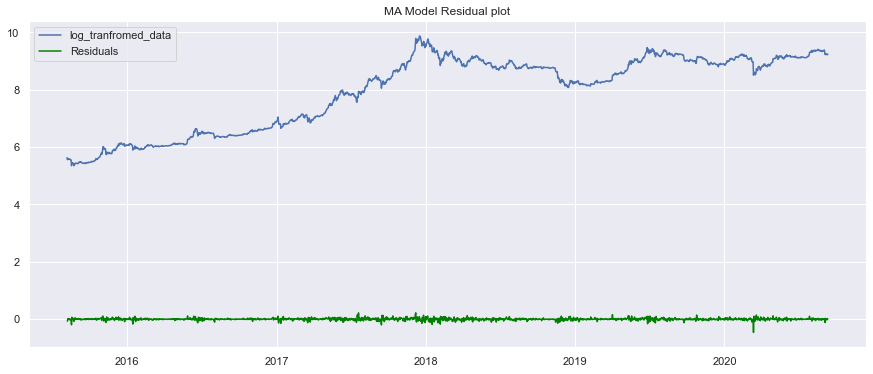

In [51]:
plt.plot(test_sta_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_MA.resid, color ='green',label= 'Residuals')
plt.title('MA Model Residual plot')
plt.legend(loc = 'best')

count    1861.000000
mean        0.000013
std         0.039538
min        -0.464124
25%        -0.013392
50%         0.000016
75%         0.015709
max         0.220854
dtype: float64


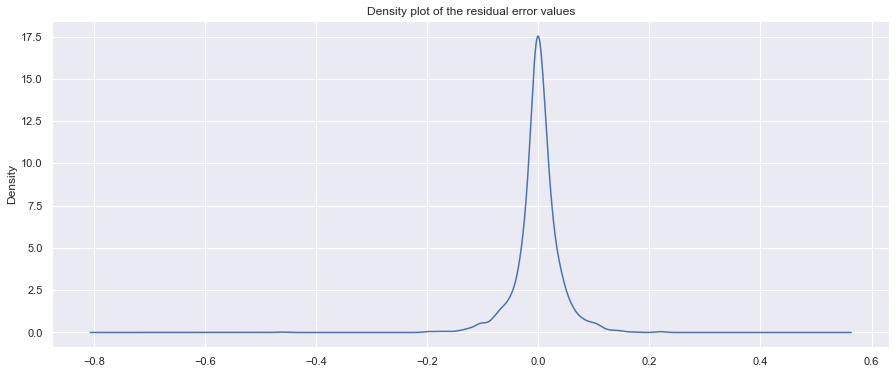

In [56]:
results_MA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_MA.resid.describe())

## ARIMA Combined model

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


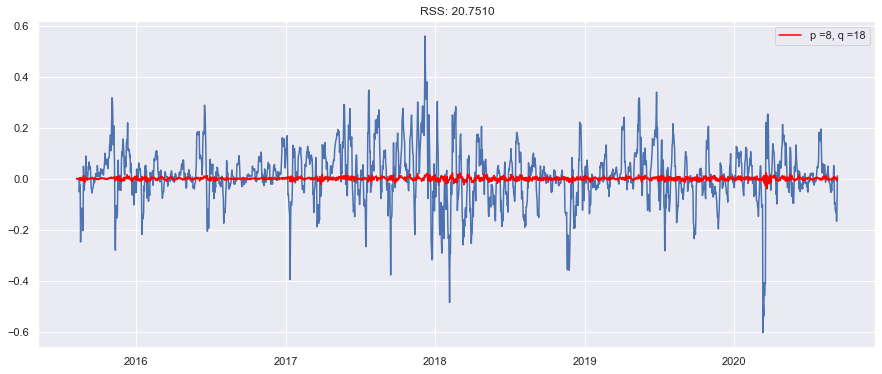

In [57]:
model = ARIMA(test_sta_logtransformed, order=(8, 1, 18))  
results_ARIMA = model.fit(trend= 'nc', disp=-1)  
plt.plot(test_sta_diff_logtrans)
plt.plot(results_ARIMA.fittedvalues, color='red', label = 'p =8, q =18')
RSS =results_ARIMA.fittedvalues-test_sta_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc='best')

#### Searching ARIMA parameters.
The above plots and models derive varying residual RSS. evaluating all these models might be difficult. So we do a grid search on all possible ARIMA parameters. We look for different p,d,q combinations, and find the best combination. p = 7 ,10,13,16,19 d = 0 to 2 taking 10 runs of the model and this will take some time to run

In [58]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1861
Model:                ARIMA(8, 1, 18)   Log Likelihood                3379.569
Method:                       css-mle   S.D. of innovations              0.039
Date:                Tue, 26 Jan 2021   AIC                          -6705.137
Time:                        01:51:31   BIC                          -6555.858
Sample:                    08-08-2015   HQIC                         -6650.125
                         - 09-10-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.D.Close      0.5930      0.224      2.645      0.008       0.154       1.033
ar.L2.D.Close      0.5512      0.049     11.306      0.000       0.456       0.647
ar.L3.D.Close     -0.0156      0.082

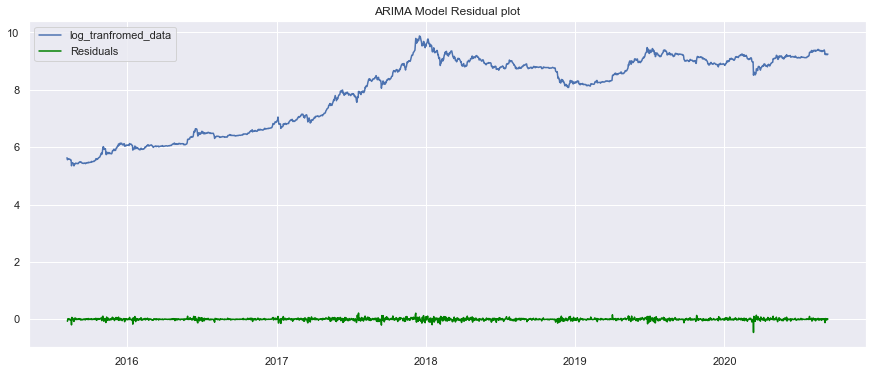

In [59]:
plt.plot(test_sta_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_ARIMA.resid, color ='green',label= 'Residuals')
plt.title('ARIMA Model Residual plot')
plt.legend(loc = 'best')

count    1861.000000
mean        0.001635
std         0.039333
min        -0.458607
25%        -0.012265
50%         0.001663
75%         0.017189
max         0.218666
dtype: float64


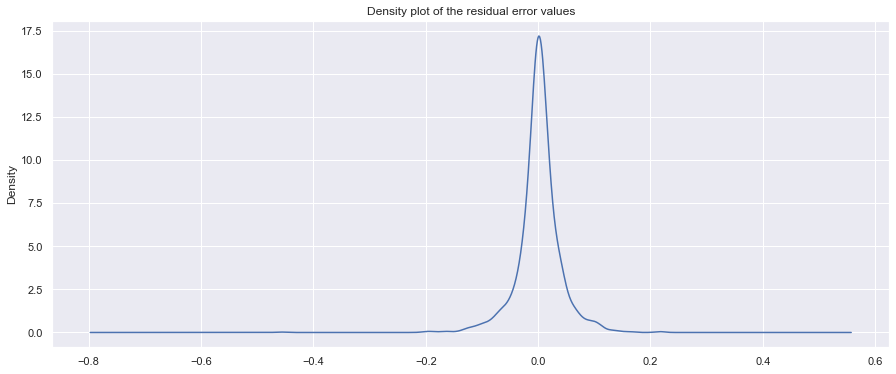

In [60]:
results_ARIMA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_ARIMA.resid.describe())

In [78]:
test = pd.read_csv("BTC-USD 1week_test.csv",index_col= 'Date')
test.index = pd.to_datetime(test.index)
test = test['Close']
test = test.sort_index()
test

Date
2020-10-01    10623.330078
2020-10-02    10585.164063
2020-10-03    10565.493164
2020-10-04    10684.428711
2020-10-05    10804.000977
2020-10-06    10621.664063
2020-10-07    10679.136719
Name: Close, dtype: float64

## Using Combined ARIMA model to predict and forecast

In [79]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2015-08-08    0.000000
2015-08-09    0.001687
2015-08-10   -0.002093
2015-08-11    0.000368
2015-08-12   -0.001434
dtype: float64


In [80]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2015-08-08    0.000000
2015-08-09    0.001687
2015-08-10   -0.000407
2015-08-11   -0.000038
2015-08-12   -0.001472
dtype: float64


In [81]:
predictions_ARIMA_log = pd.Series(test_sta_logtransformed.iloc[0], index=test_sta_logtransformed.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2015-08-07    5.633306
2015-08-08    5.633306
2015-08-09    5.634993
2015-08-10    5.632900
2015-08-11    5.633268
dtype: float64

Text(0.5, 1.0, 'RMSE: 6163.7894')

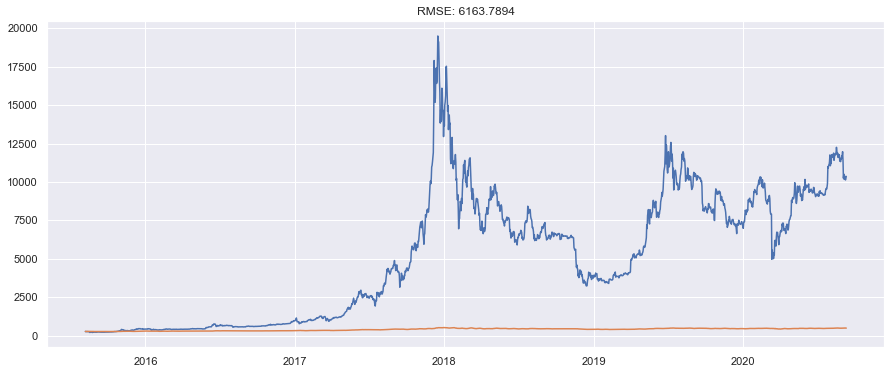

In [82]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(Bit_pre)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-Bit_pre)**2)/len(Bit_pre)))

In [83]:
dates = [pd.Timestamp('2020-10-01'), pd.Timestamp('2020-10-02'), pd.Timestamp('2020-10-03'),pd.Timestamp('2020-10-04'), pd.Timestamp('2020-10-05'), pd.Timestamp('2020-10-06'), pd.Timestamp('2020-10-07')]

forecast = pd.Series(results_ARIMA.forecast(steps=7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
error = mean_squared_error(test, forecast)
print('Test MSE: %.3f' % error)

2020-10-01    10379.250187
2020-10-02    10348.341482
2020-10-03    10186.928501
2020-10-04    10154.768012
2020-10-05    10126.708556
2020-10-06    10131.340312
2020-10-07    10086.507841
dtype: float64
Test MSE: 227123.283


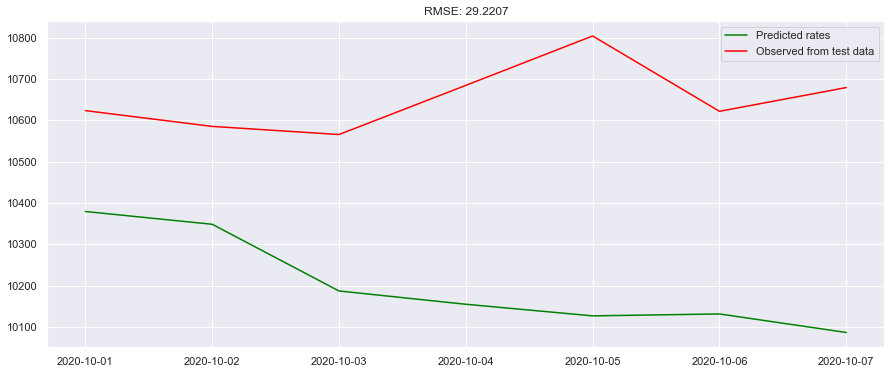

In [84]:
plt.plot(forecast, color ='green', label ='Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast-test)**2)/len(Bit_pre)))
plt.legend(loc = 'best')

## Using MA model to predict and forecast

In [85]:
predictions_MA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print(predictions_MA_diff.head())

Date
2015-08-08    0.001918
2015-08-09    0.003945
2015-08-10    0.000185
2015-08-11    0.002565
2015-08-12    0.000490
dtype: float64


In [86]:
predictions_MA_diff_cumsum = predictions_MA_diff.cumsum()
print(predictions_MA_diff_cumsum.head())

Date
2015-08-08    0.001918
2015-08-09    0.005863
2015-08-10    0.006048
2015-08-11    0.008612
2015-08-12    0.009102
dtype: float64


In [87]:
predictions_MA_log = pd.Series(test_sta_logtransformed.iloc[0], index=test_sta_logtransformed.index)
predictions_MA_log = predictions_MA_log.add(predictions_MA_diff_cumsum,fill_value=0)
predictions_MA_log.head()

Date
2015-08-07    5.633306
2015-08-08    5.635224
2015-08-09    5.639169
2015-08-10    5.639354
2015-08-11    5.641919
dtype: float64

Text(0.5, 1.0, 'RMSE: 3656.8743')

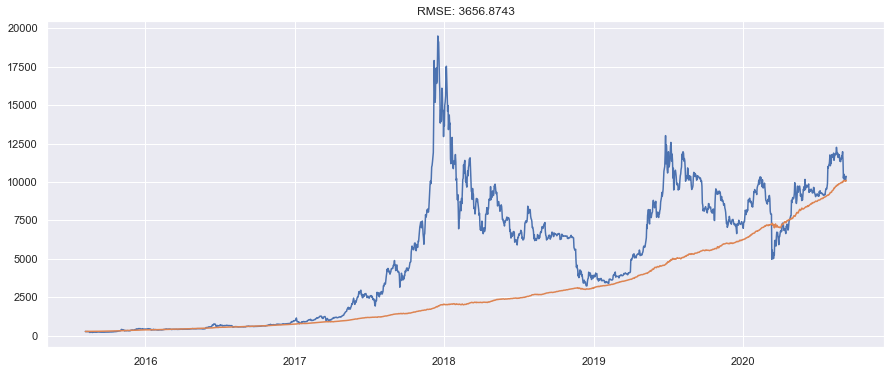

In [88]:
predictions_MA = np.exp(predictions_MA_log)
plt.plot(Bit_pre)
plt.plot(predictions_MA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_MA-Bit_pre)**2)/len(Bit_pre)))

In [89]:
dates = [pd.Timestamp('2020-10-01'), pd.Timestamp('2020-10-02'), pd.Timestamp('2020-10-03'),pd.Timestamp('2020-10-04'), pd.Timestamp('2020-10-05'), pd.Timestamp('2020-10-06'), pd.Timestamp('2020-10-07')]
forecast = pd.Series(results_MA.forecast(steps=7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
error = mean_squared_error(test, forecast)
print('Test MSE: %.3f' % error)

2020-10-01    10377.942514
2020-10-02    10422.148031
2020-10-03    10353.700090
2020-10-04    10383.023806
2020-10-05    10386.968327
2020-10-06    10427.857892
2020-10-07    10447.879295
dtype: float64
Test MSE: 69635.367


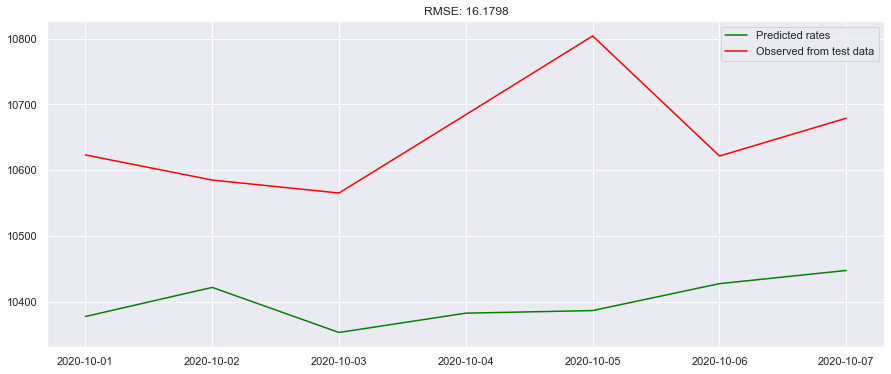

In [90]:
plt.plot(forecast, color ='green', label ='Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast-test)**2)/len(Bit_pre)))
plt.legend(loc = 'best')

## resampling the dataset to a monthly average price


Date
2015-08-31    243.265159
2015-09-30    233.595533
2015-10-31    264.855356
2015-11-30    348.883332
2015-12-31    424.464547
2016-01-31    410.844485
2016-02-29    404.408274
2016-03-31    416.525774
2016-04-30    434.339398
2016-05-31    461.954415
2016-06-30    642.869061
2016-07-31    661.356103
2016-08-31    579.585197
Freq: M, Name: Close, dtype: float64


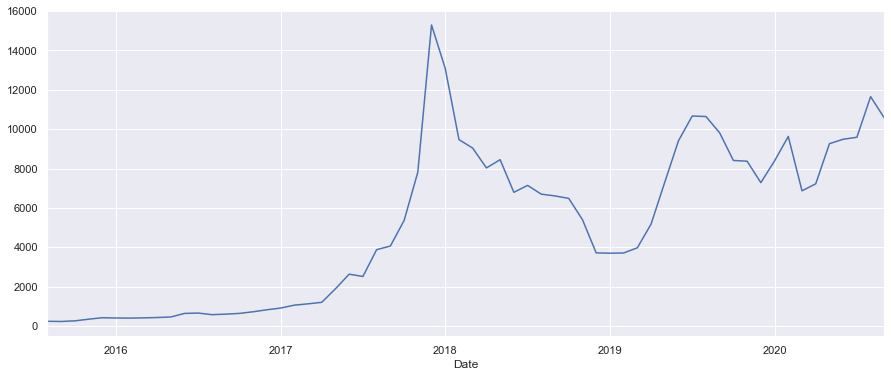

In [91]:
monthly_mean = Bit_pre.resample('M').mean()
monthly_mean
print(monthly_mean.head(13))
monthly_mean.plot()

## One more alternative to derive the forecasting performance

In [92]:
test_logtransformed = np.log(test)

In [95]:
history = [x for x in test_sta_logtransformed]
predictions = list()
for t in range(len(test)):
    output = results_MA.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_logtransformed[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_logtransformed, predictions)
print('Test MSE: %.3f' % error)

predicted=9.247438, expected=9.270808
predicted=9.247438, expected=9.267209
predicted=9.247438, expected=9.265349
predicted=9.247438, expected=9.276543
predicted=9.247438, expected=9.287672
predicted=9.247438, expected=9.270651
predicted=9.247438, expected=9.276047
Test MSE: 0.001
